In [13]:
import pandas as pd
import numpy as np
import seaborn as sb
import calendar
from matplotlib import pyplot as plt
from matplotlib import colors as mcolors
from bokeh.io import output_file, show, output_notebook
from bokeh.models import ColumnDataSource, GMapOptions
from bokeh.plotting import gmap, figure
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)
import matplotlib.ticker as tick
from math import radians, sin, cos, acos
import math

In [14]:
%matplotlib inline

In [15]:
df = pd.read_csv('2017-fordgobike-tripdata.csv')

In [16]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1987.0,Male
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,1965.0,Female
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,NaN,NaN
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,NaN,NaN
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,1997.0,Female


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 15 columns):
duration_sec               519700 non-null int64
start_time                 519700 non-null object
end_time                   519700 non-null object
start_station_id           519700 non-null int64
start_station_name         519700 non-null object
start_station_latitude     519700 non-null float64
start_station_longitude    519700 non-null float64
end_station_id             519700 non-null int64
end_station_name           519700 non-null object
end_station_latitude       519700 non-null float64
end_station_longitude      519700 non-null float64
bike_id                    519700 non-null int64
user_type                  519700 non-null object
member_birth_year          453159 non-null float64
member_gender              453238 non-null object
dtypes: float64(5), int64(4), object(6)
memory usage: 59.5+ MB


  * duration_sec needs to be in minutes
  * start_time and end_time needs to be in time format
  * find the distance between end_station_latitude and end_station_longitude
  * find age of member
  

In [ ]:
### to select only 100000 records for testing
np.random.seed(123)
# create a set of random integers 
# (based on the number of rows in df)
samples = np.random.choice(df.shape[0], 100000, replace = False) 
# Use 'samples' to select rows from df
df_samp = df.loc[samples,:]

In [25]:
df_samp.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender
352785,382,2017-09-13 08:46:47.4200,2017-09-13 08:53:10.3240,16,Steuart St at Market St,37.794130,-122.394430,50,2nd St at Townsend St - Coming Soon,37.780526,-122.390288,1258,Subscriber,1975.0,Male
79524,927,2017-12-03 13:46:51.9390,2017-12-03 14:02:19.6520,160,West Oakland BART Station,37.805318,-122.294837,164,Isabella St at San Pablo Ave,37.814988,-122.274844,123,Subscriber,1972.0,Female
141818,366,2017-11-12 13:20:17.0640,2017-11-12 13:26:23.1400,196,Grand Ave at Perkins St,37.808894,-122.256460,182,19th Street BART Station,37.809013,-122.268247,631,Subscriber,1985.0,Female
330405,337,2017-09-19 18:25:01.5190,2017-09-19 18:30:39.2680,60,8th St at Ringold St,37.774520,-122.409449,44,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,2797,Subscriber,1990.0,Male
227871,643,2017-10-19 08:35:43.8960,2017-10-19 08:46:27.4620,223,16th St Mission BART Station 2,37.764765,-122.420091,114,Rhode Island St at 17th St,37.764478,-122.402570,2220,Subscriber,1989.0,Female


In [26]:
df_samp['start_time']=pd.to_datetime(df_samp['start_time'])
df_samp['end_time']=pd.to_datetime(df_samp['end_time'])

In [27]:
df_samp['start_time_date']=df_samp['start_time'].dt.date
df_samp['end_time_date']=df_samp['end_time'].dt.date

In [28]:
df_samp['start_time_year_month']=df_samp['start_time'].map(lambda x: x.strftime('%Y-%m'))
df_samp['end_time_year_month']=df_samp['end_time'].map(lambda x: x.strftime('%Y-%m'))


In [29]:
df_samp['start_time_year']=df_samp['start_time'].dt.year.astype(int)
df_samp['end_time_year']=df_samp['end_time'].dt.year.astype(int)


In [30]:
df_samp['start_time_month']=df_samp['start_time'].dt.month.astype(int)
df_samp['end_time_month']=df_samp['end_time'].dt.month.astype(int)


In [31]:
df_samp['start_time_hour_minute']=df_samp['start_time'].map(lambda x: x.strftime('%H-%m'))
df_samp['end_time_hour_minute']=df_samp['end_time'].map(lambda x: x.strftime('%H-%m'))


In [32]:

df_samp['start_time_hour']=df_samp['start_time'].dt.hour
df_samp['end_time_hour']=df_samp['end_time'].dt.hour


In [33]:
df_samp['start_time_weekday']=df_samp['start_time'].dt.weekday_name
df_samp['end_time_weekday']=df_samp['end_time'].dt.weekday_name

In [34]:
df_samp['start_time_weekday_abbr']=df_samp['start_time'].dt.weekday.apply(lambda x: calendar.day_abbr[x])
df_samp['end_time_weekday_abbr']=df_samp['end_time'].dt.weekday.apply(lambda x: calendar.day_abbr[x])


In [35]:
df_samp['start_time_year_month_renamed'] = df_samp['start_time'].dt.strftime('%y' + '-' + '%m')


In [36]:
df_samp['start_time_weekday'].sample(10)

346294    Thursday
248543    Thursday
194220    Saturday
160626     Tuesday
247419      Friday
405974    Saturday
33495       Friday
450202    Thursday
439197     Tuesday
113669     Tuesday
Name: start_time_weekday, dtype: object

In [37]:
df_samp['duration_min'] = df_samp['duration_sec']/60


In [38]:
df_samp['duration_min'].sample(10)

149290     4.750000
102490     2.350000
443353    13.733333
220274    44.150000
275392    28.083333
22242      4.600000
397543    12.283333
428083    13.583333
499529    13.133333
433467    10.933333
Name: duration_min, dtype: float64

In [41]:
### Calculations were derived from here using Haversine.py
### https://www.movable-type.co.uk/scripts/latlong.html

def distance(origin, destination):

    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [43]:

df_samp['distance_km'] = df_samp.apply(lambda x: distance((x['start_station_latitude'], x['start_station_longitude']), (x['end_station_latitude'], x['end_station_longitude'])), axis=1)

df_samp['distance_miles'] = df_samp['distance_km']*0.621371


In [44]:
df_samp.distance_miles.head(5)

352785    0.966773
79524     1.279604
141818    0.643485
330405    0.469725
227871    0.957208
Name: distance_miles, dtype: float64

df.shape()

In [45]:
df_samp.shape

(100000, 35)

  * set up visuals with google map cyclist

In [46]:
len(df_samp.member_birth_year )

100000

In [47]:
df_samp['member_age'] = 2018-df_samp['member_birth_year']

In [48]:
df_samp.member_age

352785    43.0
79524     46.0
141818    33.0
330405    28.0
227871    29.0
40828     35.0
265739    37.0
425804     NaN
185595    55.0
18284     30.0
78456     50.0
330984    27.0
143990    42.0
114769    25.0
472678    36.0
290037    29.0
183477    30.0
227146     NaN
127286    33.0
381618     NaN
236174    30.0
204642    43.0
136459    35.0
162568    50.0
382802    30.0
331837    27.0
519359    28.0
324135    48.0
519698    37.0
319013     NaN
          ... 
277355    59.0
357508    34.0
458095    48.0
222221    33.0
74632     36.0
422896    35.0
469632    49.0
380324    28.0
485365    38.0
309289    40.0
6586      60.0
86121      NaN
355806    32.0
228285    33.0
368617    43.0
39466     42.0
194165    33.0
62795     39.0
480201    37.0
519679    31.0
388484    31.0
121573    41.0
161443    46.0
472337    34.0
143040     NaN
380572    62.0
340115    27.0
116179    42.0
95785     29.0
179284    29.0
Name: member_age, Length: 100000, dtype: float64

  * ISSUES
  * Age groups of people who took bike rides/ per age group
  * Number of daily bike rides
  * Get distance of bike rides
  * Duration of bike rides
  * Bike rides gender
  * Bike rides per weekdays
  * Bike rides per hourly rides
  * Count of rides from subscribers and customers
  * Average duration from sub and cust
  * monthly trends of bike rides per subscribers by age group
  * which docks are used most frequently top 10 stations
  * eBikes launched around April 24th
  * List paths that are most commonly used
  

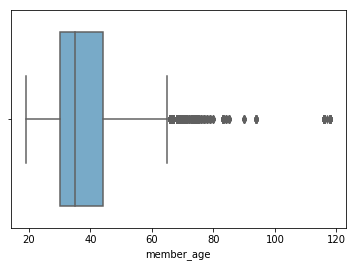

In [49]:
sb.boxplot(x='member_age', data=df_samp, palette='Blues', orient='h')

In [50]:
p=figure(height=200)
p.diamond_cross(x=df_samp.member_age , y=df_samp.duration_sec)
show(p)

In [51]:
np.mean(df_samp.member_age)

37.582629840337674

#### Finding daily number of bike rides 

In [52]:
def transform_axis_fmt(tick_val, pos):
    if tick_val >= 1000:
        val = int(tick_val/1000)
        return '{:d}K'.format(val)
    elif tick_val >= 1000000: 
        val = int(tick_val/1000000)
        return '{:d}M'.format(val)
    else:
        return int(tick_val)

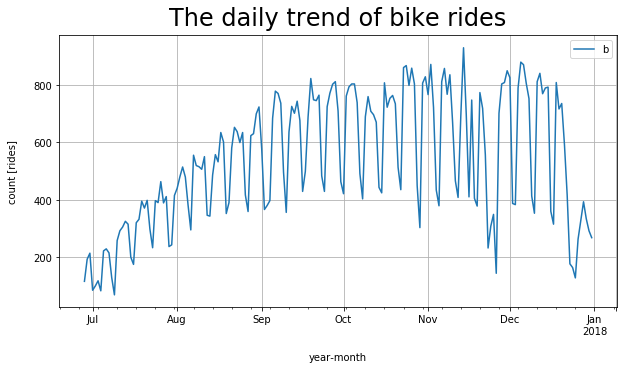

In [53]:
df_samp.groupby(df_samp.start_time.dt.to_period('D')).agg('count')['bike_id'].plot(kind = 'line', figsize = [10, 5])
plt.title('The daily trend of bike rides', fontsize=24, y=1.015)
plt.xlabel('year-month', labelpad=16)
plt.ylabel('count [rides]', labelpad=16)
ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(transform_axis_fmt))
plt.grid()
plt.legend('bikes')


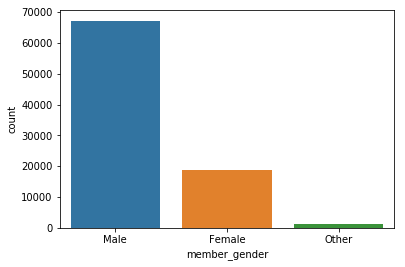

In [54]:
sb.countplot(data = df_samp, x = 'member_gender')

In [55]:
trip_by_weekday_df = df_samp.groupby('start_time_weekday_abbr').agg({'bike_id':'count'})
trip_by_weekday_df['perc'] = (trip_by_weekday_df['bike_id']/trip_by_weekday_df['bike_id'].sum())*100


In [56]:
weekday_index = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

Text(0,0.5,'percentage(%) [rides]')

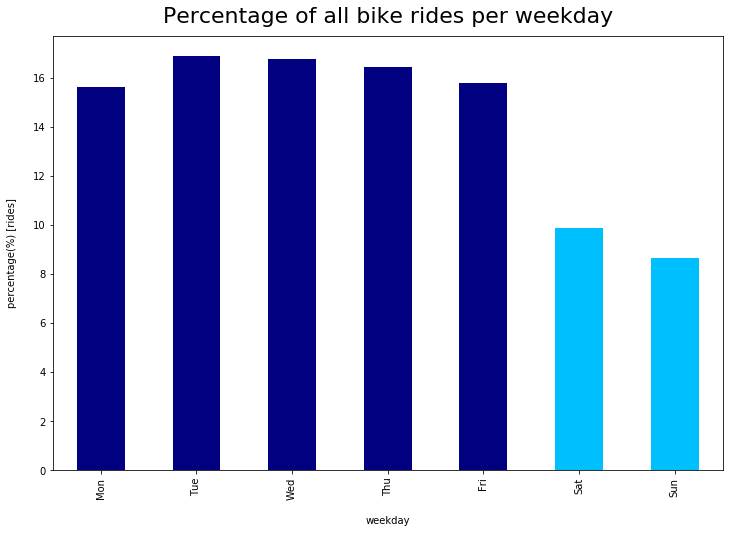

In [57]:
new_color = ['navy', 'navy', 'navy', 'navy', 'navy', 'deepskyblue', 'deepskyblue']
trip_by_weekday_df.reindex(weekday_index)['perc'].plot(kind='bar', color=new_color, figsize=(12,8), legend=False)
plt.title('Percentage of all bike rides per weekday', fontsize=22, y=1.015)
plt.xlabel('weekday', labelpad=16)
plt.ylabel('percentage(%) [rides]', labelpad=16)


#### Age Groups bikers per month

  * Creating age groups of bikers

In [58]:

df_samp['member_age_bins'] = df_samp['member_age'].apply(lambda x: '10 - 20' if 10<x<=20
                                                  else '21 - 30' if 20<x<=30
                                                  else '31 - 40' if 30<x<=40
                                                  else '41 - 50' if 40<x<=50
                                                  else '51 - 60' if 50<x<=60
                                                  else '61 - 70' if 60<=x<=70
                                                  else '71 - 80' if 70<=x<=80
                                                  else '81 - 90' if 80<=x<=90
                                                  else '91 - 100'if 90<=x<=100
                                                  else x)


In [59]:
df_samp.member_age_bins.head(5)

352785    41 - 50
79524     41 - 50
141818    31 - 40
330405    21 - 30
227871    21 - 30
Name: member_age_bins, dtype: object

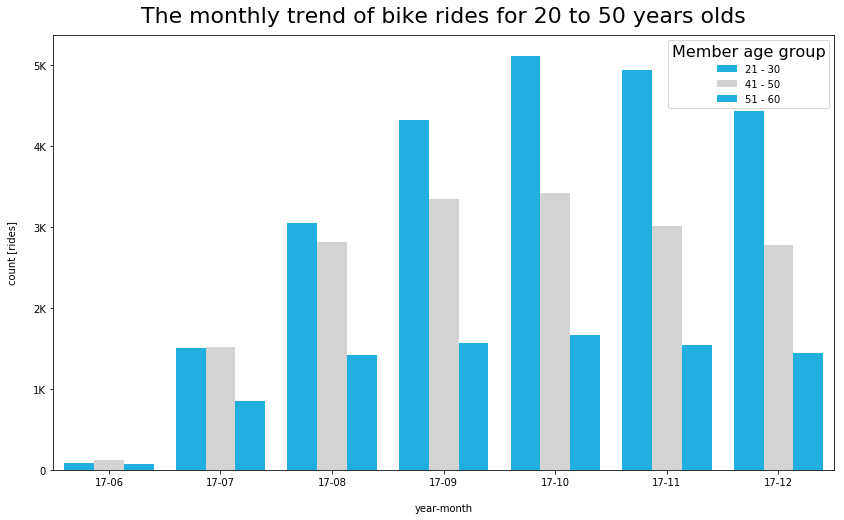

In [60]:
plt.figure(figsize=(14,8))
my_palette = {'21 - 30': 'deepskyblue', '31 - 40': 'navy', '41 - 50': 'lightgrey','51 - 60': 'deepskyblue'}
ax = sb.countplot(x='start_time_year_month_renamed', hue='member_age_bins', palette=my_palette,
                   data=df_samp[df_samp['member_age_bins'].isin(['21 - 30', '31 - 41', '41 - 50', '51 - 60'])].sort_values(by=['start_time_year_month_renamed', 'member_age_bins']))
plt.title('The monthly trend of bike rides for 20 to 50 years olds', fontsize=22, y=1.015)
plt.xlabel('year-month', labelpad=16)
plt.ylabel('count [rides]', labelpad=16)
leg = ax.legend()
leg.set_title('Member age group',prop={'size':16})
ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(transform_axis_fmt))



In [62]:

trip_by_hour = df_samp.groupby('start_time_hour').agg({'bike_id':'count'}).reset_index()

In [63]:
trip_by_hour['bike_id'] = (trip_by_hour['bike_id']/trip_by_hour['bike_id'].sum())*100

Text(0,0.5,'percentage(%) [rides]')

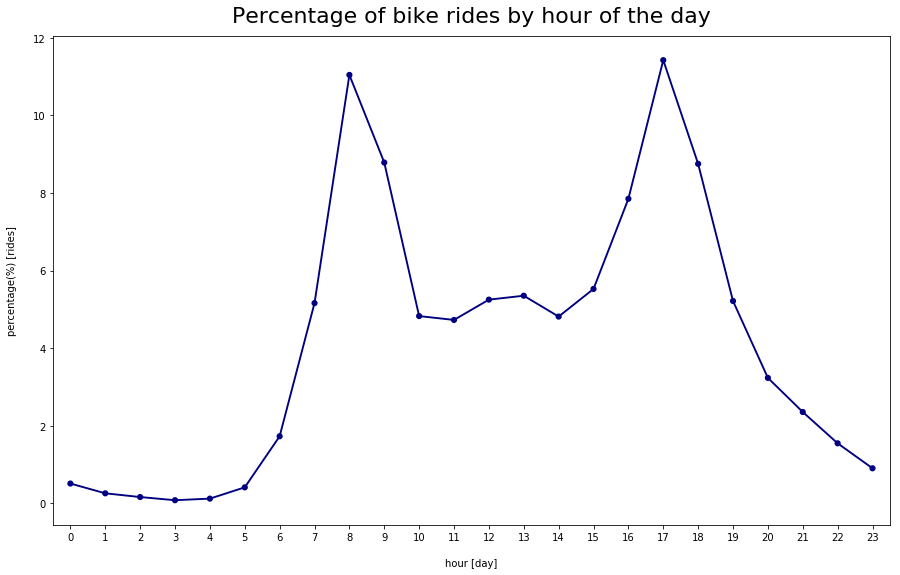

In [64]:
plt.figure(figsize=(15,9))
sb.pointplot(x='start_time_hour', y='bike_id', scale=.7, color='navy', data=trip_by_hour)
plt.title('Percentage of bike rides by hour of the day', fontsize=22, y=1.015)
plt.xlabel('hour [day]', labelpad=16)
plt.ylabel('percentage(%) [rides]', labelpad=16)



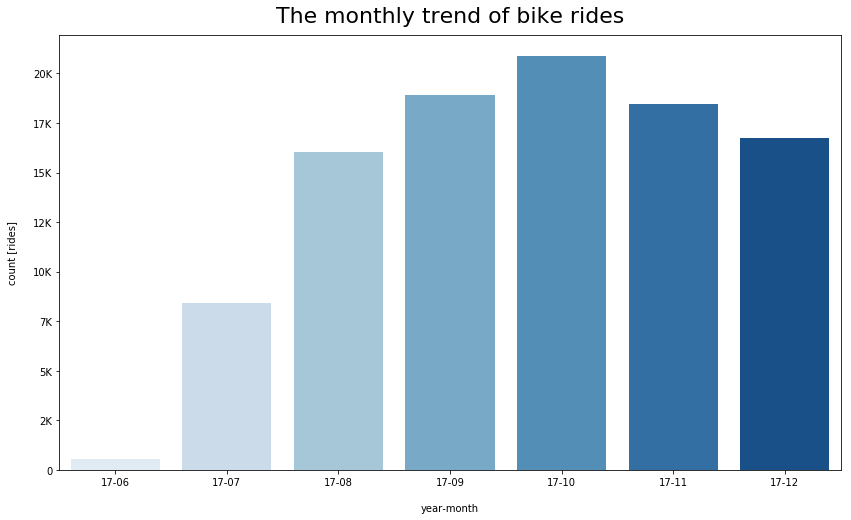

In [65]:
plt.figure(figsize=(14,8))
sb.countplot(x='start_time_year_month_renamed', palette="Blues", 
             data=df_samp.sort_values(by='start_time_year_month_renamed'))
plt.title('The monthly trend of bike rides', fontsize=22, y=1.015)
plt.xlabel('year-month', labelpad=16)
plt.ylabel('count [rides]', labelpad=16)
ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(transform_axis_fmt))

#### Percentage of all bike rides per group

In [66]:

trip_by_age_df = df_samp.groupby('member_age_bins').agg({'bike_id':'count'})


In [67]:

trip_by_age_df['perc'] = (trip_by_age_df['bike_id']/trip_by_age_df['bike_id'].sum())*100


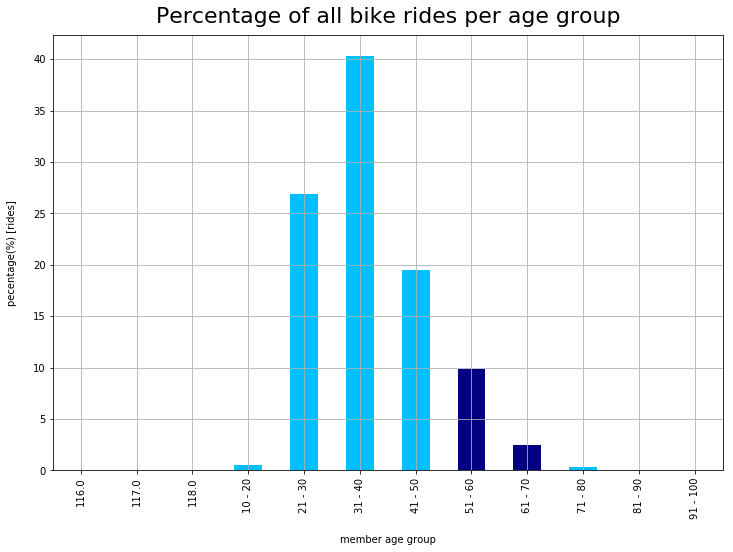

In [68]:

new_color = ['deepskyblue', 'navy', 'navy', 'deepskyblue', 'deepskyblue']
trip_by_age_df['perc'].plot(kind='bar', color=new_color, figsize=(12,8))
plt.title('Percentage of all bike rides per age group', fontsize=22, y=1.015)
plt.xlabel('member age group', labelpad=16)
plt.ylabel('pecentage(%) [rides]', labelpad=16)
plt.grid()


  * count of bike rides of subscribers and customers

In [69]:
count_of_rides_per_user_type = df_samp.groupby('user_type').size().reset_index(name='count')


In [70]:
count_of_rides_per_user_type['count']/len(df)*100

0     4.076775
1    15.165095
Name: count, dtype: float64

In [71]:
user_type_count_per_year_df = df_samp.groupby(["start_time_year_month_renamed", "user_type"]).size().reset_index()


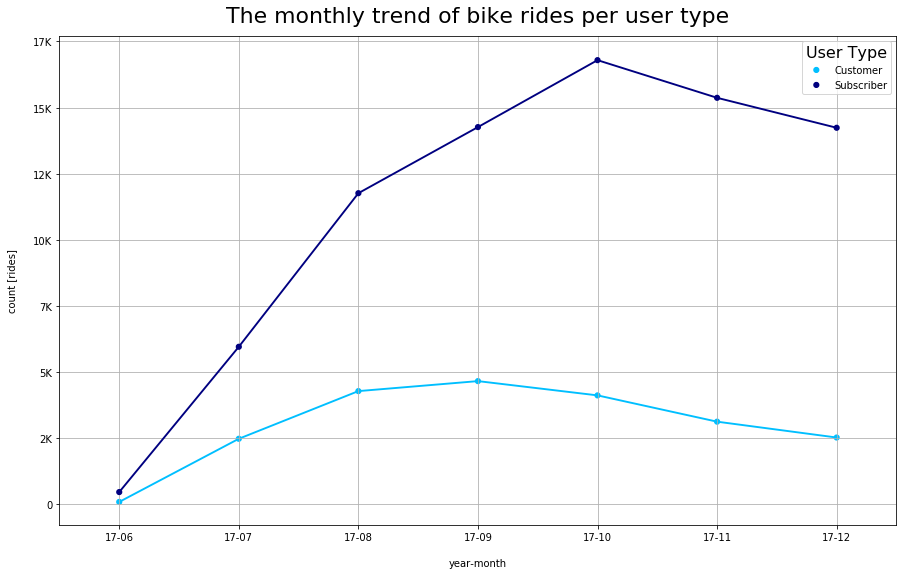

In [72]:

plt.figure(figsize=(15,9))
my_palette = {'Subscriber':'navy', 'Customer':'deepskyblue'}
ax = sb.pointplot(x='start_time_year_month_renamed', y=0, hue='user_type', palette=my_palette, scale=.7, 
                  data=user_type_count_per_year_df)
plt.title('The monthly trend of bike rides per user type', fontsize=22, y=1.015)
plt.xlabel('year-month', labelpad=16)
plt.ylabel('count [rides]', labelpad=16)
leg = ax.legend()
leg.set_title('User Type',prop={'size':16})
ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(transform_axis_fmt))
plt.grid()


In [73]:
df_samp.start_time_year_month.head(5)

352785    2017-09
79524     2017-12
141818    2017-11
330405    2017-09
227871    2017-10
Name: start_time_year_month, dtype: object

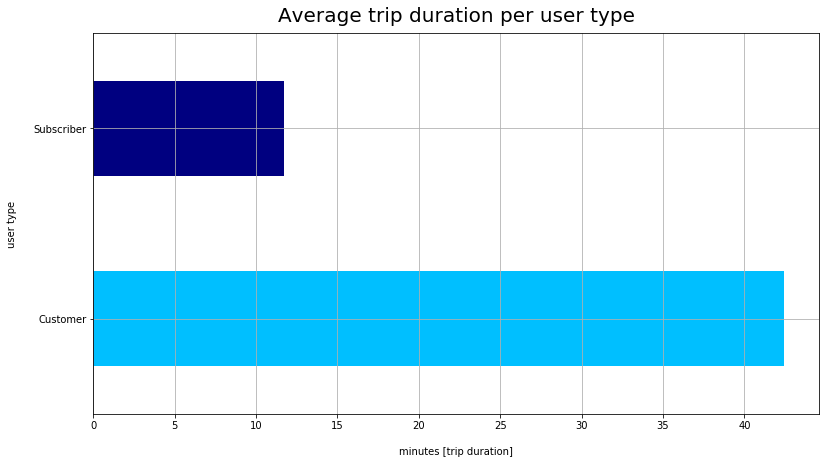

In [74]:
new_color=['deepskyblue', 'navy']
ax = df_samp.groupby('user_type')['duration_min'].mean().plot(kind='barh', color=new_color, figsize=(13,7))
ax.set_title('Average trip duration per user type', fontsize=20, y=1.015)
ax.set_ylabel('user type', labelpad=16)
ax.set_xlabel('minutes [trip duration]', labelpad=16)
plt.grid()

## for i,j in enumerate(duration_min_pr["duration_min"]):
##    ax.text(.7,i,str(round(j,2))+' minutes', weight='bold', ha='left', fontsize=16, color="white")
    

In [75]:
subscriber_age_df = df_samp[df_samp['user_type']=='Subscriber'].groupby(['start_time_year_month_renamed', 'member_age_bins']).agg({'bike_id':'count'}).reset_index()


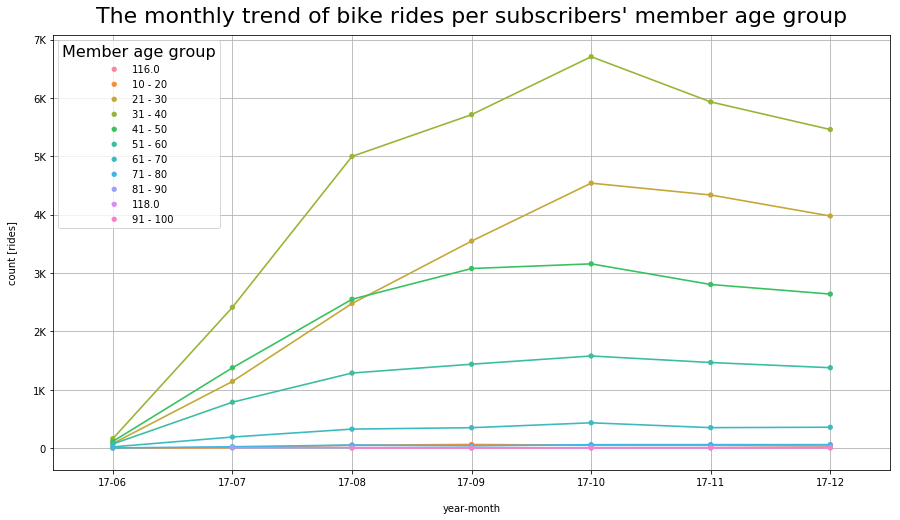

In [76]:
plt.figure(figsize=(15,8))
ax = sb.pointplot(x='start_time_year_month_renamed', y='bike_id', hue='member_age_bins', 
                  scale=.6, data=subscriber_age_df)
plt.title("The monthly trend of bike rides per subscribers' member age group", fontsize=22, y=1.015)
plt.xlabel('year-month', labelpad=16)
plt.ylabel('count [rides]', labelpad=16)
leg = ax.legend()
leg.set_title('Member age group',prop={'size':16})
ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(transform_axis_fmt))
plt.grid()


In [77]:
customer_age_df = df_samp[df_samp['user_type']=='Customer'].groupby(['start_time_year_month_renamed', 'member_age_bins']).agg({'bike_id':'count'}).reset_index()


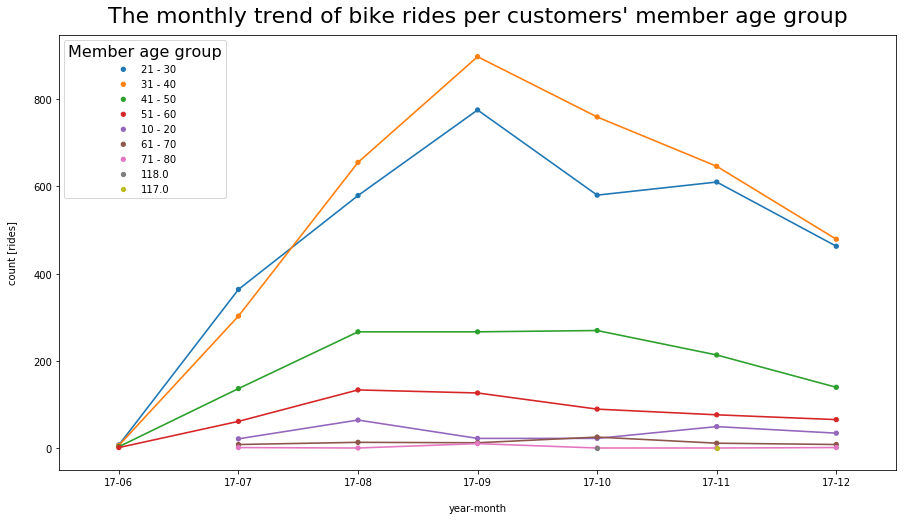

In [78]:
plt.figure(figsize=(15,8))
ax = sb.pointplot(x='start_time_year_month_renamed', y='bike_id', hue='member_age_bins', 
                  scale=.6, data=customer_age_df)
plt.title("The monthly trend of bike rides per customers' member age group", fontsize=22, y=1.015)
plt.xlabel('year-month', labelpad=16)
plt.ylabel('count [rides]', labelpad=16)
leg = ax.legend()
leg.set_title('Member age group',prop={'size':16})
ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(transform_axis_fmt))

In [79]:
df_samp.distance_miles.describe()

count    100000.000000
mean          0.987820
std           0.655604
min           0.000000
25%           0.559877
50%           0.869165
75%           1.287788
max          42.369292
Name: distance_miles, dtype: float64

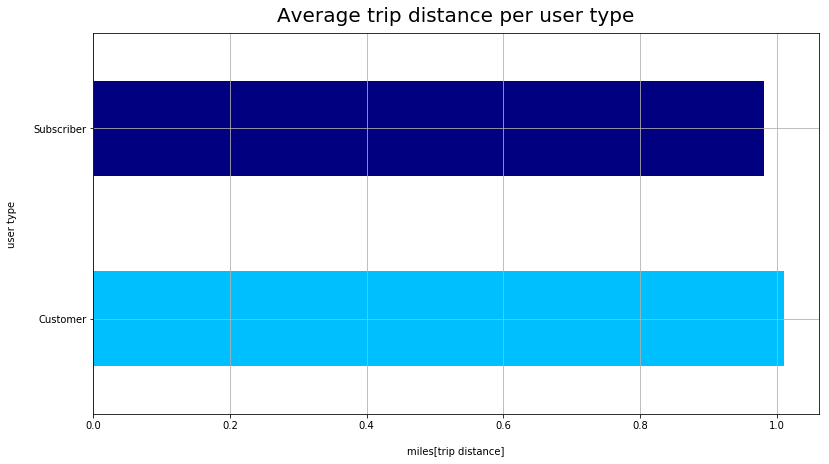

In [80]:
new_color=['deepskyblue', 'navy']
ax = df_samp.groupby('user_type')['distance_miles'].mean().plot(kind='barh', color=new_color, figsize=(13,7))
ax.set_title('Average trip distance per user type', fontsize=20, y=1.015)
ax.set_ylabel('user type', labelpad=16)
ax.set_xlabel('miles[trip distance]', labelpad=16)
plt.grid()


In [81]:
df_samp.groupby('user_type')['distance_miles'].mean()

user_type
Customer      1.010843
Subscriber    0.981631
Name: distance_miles, dtype: float64

In [82]:
df_samp.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,start_time_weekday,end_time_weekday,start_time_weekday_abbr,end_time_weekday_abbr,start_time_year_month_renamed,duration_min,distance_km,distance_miles,member_age,member_age_bins
352785,382,2017-09-13 08:46:47.420,2017-09-13 08:53:10.324,16,Steuart St at Market St,37.794130,-122.394430,50,2nd St at Townsend St - Coming Soon,37.780526,...,Wednesday,Wednesday,Wed,Wed,17-09,6.366667,1.555870,0.966773,43.0,41 - 50
79524,927,2017-12-03 13:46:51.939,2017-12-03 14:02:19.652,160,West Oakland BART Station,37.805318,-122.294837,164,Isabella St at San Pablo Ave,37.814988,...,Sunday,Sunday,Sun,Sun,17-12,15.450000,2.059324,1.279604,46.0,41 - 50
141818,366,2017-11-12 13:20:17.064,2017-11-12 13:26:23.140,196,Grand Ave at Perkins St,37.808894,-122.256460,182,19th Street BART Station,37.809013,...,Sunday,Sunday,Sun,Sun,17-11,6.100000,1.035589,0.643485,33.0,31 - 40
330405,337,2017-09-19 18:25:01.519,2017-09-19 18:30:39.268,60,8th St at Ringold St,37.774520,-122.409449,44,Civic Center/UN Plaza BART Station (Market St ...,37.781074,...,Tuesday,Tuesday,Tue,Tue,17-09,5.616667,0.755950,0.469725,28.0,21 - 30
227871,643,2017-10-19 08:35:43.896,2017-10-19 08:46:27.462,223,16th St Mission BART Station 2,37.764765,-122.420091,114,Rhode Island St at 17th St,37.764478,...,Thursday,Thursday,Thu,Thu,17-10,10.716667,1.540478,0.957208,29.0,21 - 30


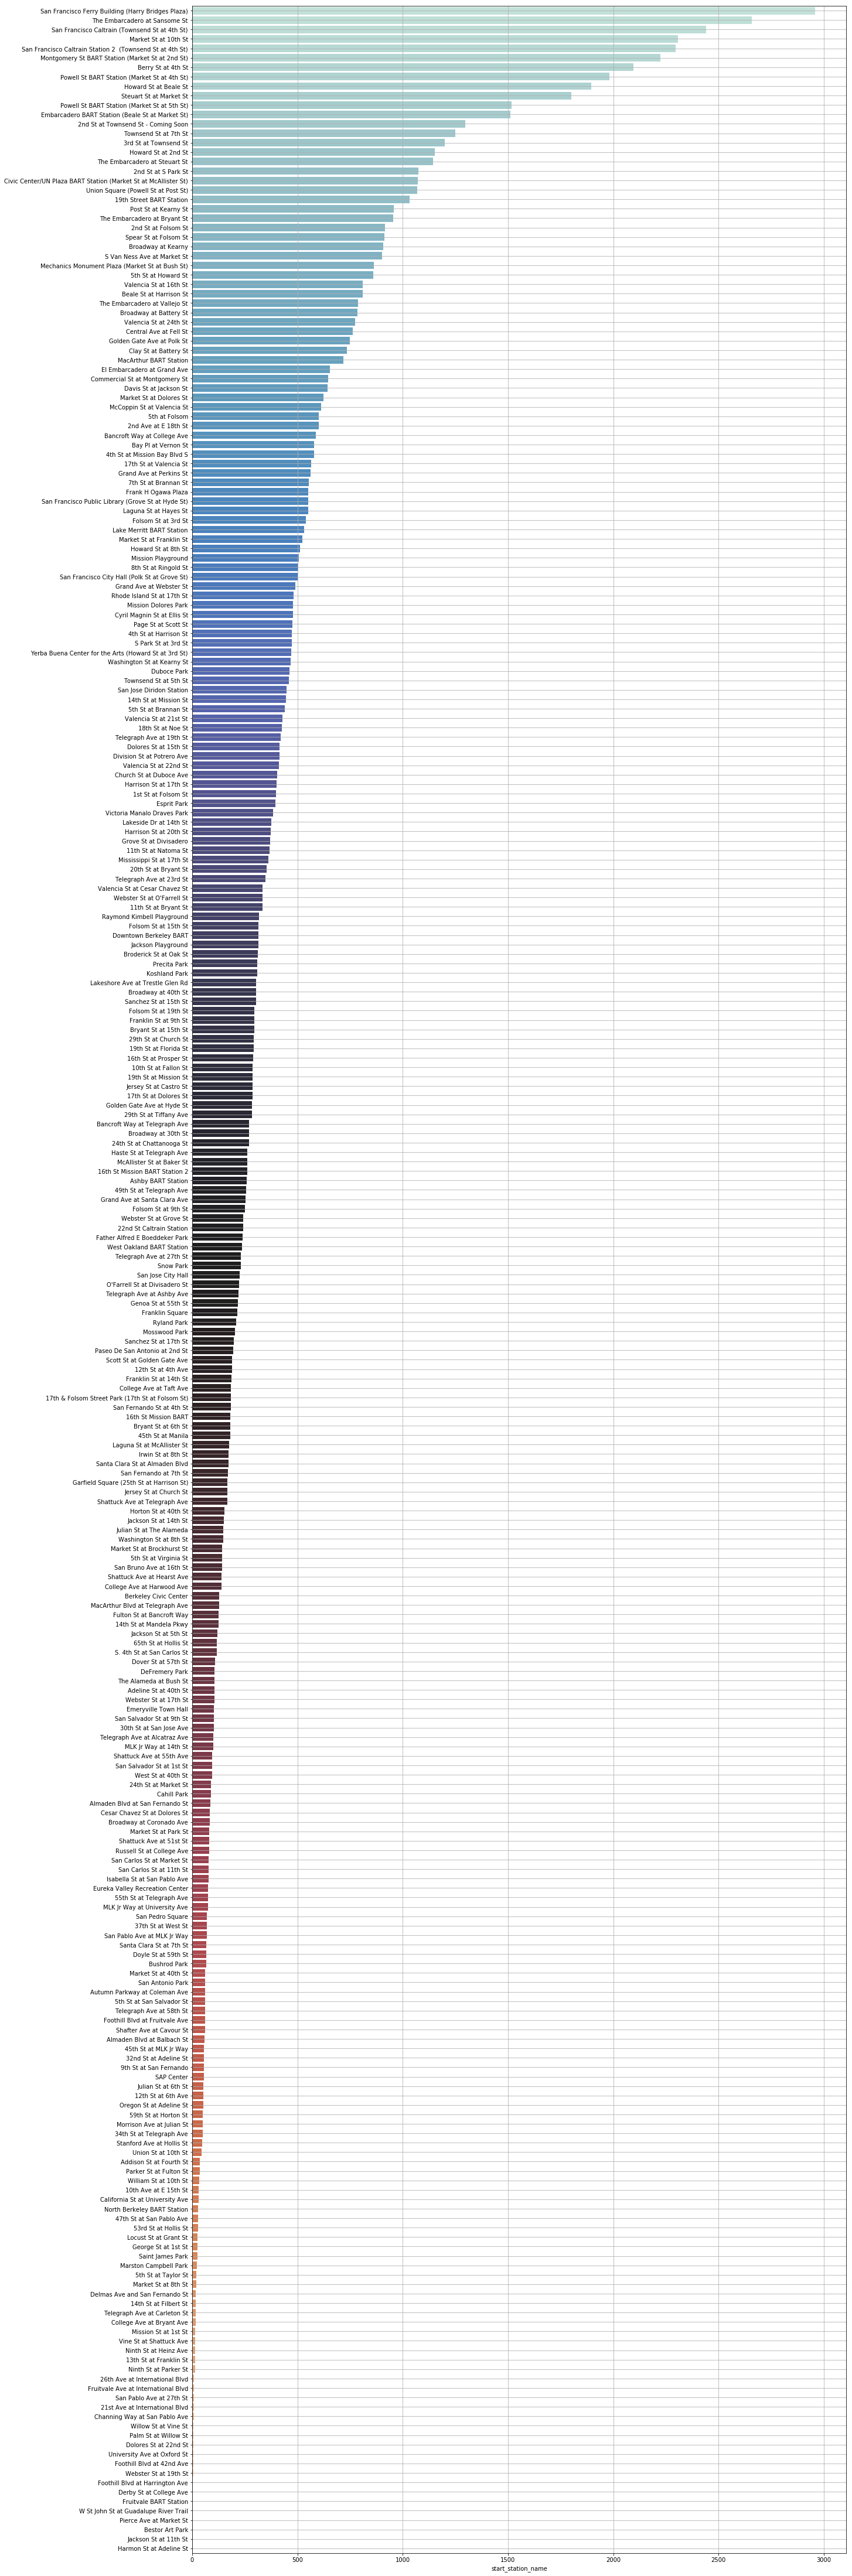

In [85]:
plt.figure(figsize=(20,80))
data=df_samp.start_station_name.value_counts()
sb.barplot(y=data.index, x = data, orient='h',palette='icefire')
plt.grid()

In [84]:

top_50_popular_station = df_samp.groupby(['start_station_name']).size().sort_values(ascending=False)[:50].to_frame().reset_index().start_station_name




In [520]:
print (top_50_popular_station)

0     San Francisco Ferry Building (Harry Bridges Pl...
1                         The Embarcadero at Sansome St
2        San Francisco Caltrain (Townsend St at 4th St)
3                                  Market St at 10th St
4     San Francisco Caltrain Station 2  (Townsend St...
5      Montgomery St BART Station (Market St at 2nd St)
6                                    Berry St at 4th St
7          Powell St BART Station (Market St at 4th St)
8                                 Howard St at Beale St
9                               Steuart St at Market St
10         Powell St BART Station (Market St at 5th St)
11     Embarcadero BART Station (Beale St at Market St)
12                  2nd St at Townsend St - Coming Soon
13                                Townsend St at 7th St
14                                3rd St at Townsend St
15                                  Howard St at 2nd St
16                        The Embarcadero at Steuart St
17                                  2nd St at S 